<a href="https://colab.research.google.com/github/mirpouya/Western-University/blob/main/Assignment_2_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grade: /100 + 15 Bonus

## Instructions



* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the Lab assignment.



This notebook contains the questions for Assignment 2. Make sure to complete this assignment individually and appropriately reference all external code and documentation used.

### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

## Part 1 - Multi-Layer Perceptron (MLP) for Regression (65 pts)

### Dataset

The dataset `startup_success_dataset.csv` contains information on startup companies and is designed to predict the success of these companies based on various features. Your tasks involve data preprocessing, exploratory data analysis, applying machine learning models, and evaluating their performance and fairness.

### Part1 Task A - Data Loading and Preprocessing (10 pts)

Load the provided startup success dataset and prepare it for analysis. Perform necessary preprocessing steps to handle any data inconsistencies and prepare the data for machine learning models.

1. Load the dataset and  remove any unnecessary columns.
2. Check for missing values and handle them appropriately (handle missing values separately for numerical and categorical columns. For numerical columns, fill missing values with the mean of their respective columns. For categorical data, if missing values exist, fill them with the mode (most frequent value).
3. Encode categorical variables using appropriate encoding techniques.
4. Split the dataset into features and target variables (`SuccessScore`).


In [3]:
startup_success_dataset = pd.read_csv("/content/startup_success_dataset.csv")
startup_success_dataset.head()

,StartupID,Industry,Age,Location,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,SuccessScore
0,1,Finance,17,Asia,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,63.721391
1,2,Education,9,Asia,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,86.092406
2,3,Tech,1,North America,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,65.511363
3,4,Finance,20,Europe,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,67.447699
4,5,Finance,13,Europe,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,71.060720


In [4]:
startup_success_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   StartupID             1000 non-null   int64  
 1   Industry              1000 non-null   object 
 2   Age                   1000 non-null   int64  
 3   Location              1000 non-null   object 
 4   Funding               1000 non-null   float64
 5   EmployeeCount         1000 non-null   int64  
 6   ProductCount          1000 non-null   int64  
 7   Patents               1000 non-null   int64  
 8   Partnerships          1000 non-null   int64  
 9   AnnualRevenue         1000 non-null   float64
 10  ProfitMargin          1000 non-null   float64
 11  MarketShare           1000 non-null   float64
 12  CustomerSatisfaction  1000 non-null   float64
 13  SuccessScore          1000 non-null   float64
dtypes: float64(6), int64(6), object(2)
memory usage: 109.5+ KB


In [5]:
# separate categorical and numerical features
categorical_feats = startup_success_dataset.select_dtypes(include=["object"])
categorical_feats.head()

,Industry,Location
0,Finance,Asia
1,Education,Asia
2,Tech,North America
3,Finance,Europe
4,Finance,Europe


In [7]:
startup_success_dataset.isnull().sum()

StartupID               0
Industry                0
Age                     0
Location                0
Funding                 0
EmployeeCount           0
ProductCount            0
Patents                 0
Partnerships            0
AnnualRevenue           0
ProfitMargin            0
MarketShare             0
CustomerSatisfaction    0
SuccessScore            0
dtype: int64

In [8]:
# correlation matrix for feature correlation analysis

correlation_matrix = startup_success_dataset.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      StartupID       Age   Funding  EmployeeCount  \
StartupID              1.000000  0.023389  0.014668       0.003597   
Age                    0.023389  1.000000 -0.000321      -0.027202   
Funding                0.014668 -0.000321  1.000000       0.033229   
EmployeeCount          0.003597 -0.027202  0.033229       1.000000   
ProductCount          -0.006112  0.029678 -0.008895       0.009034   
Patents               -0.023543  0.012398 -0.040828       0.022077   
Partnerships          -0.025360 -0.026054 -0.060467       0.019268   
AnnualRevenue          0.031990  0.017456 -0.035182      -0.034855   
ProfitMargin           0.021581  0.045827 -0.016364       0.028215   
MarketShare            0.001386 -0.028889 -0.014639      -0.042151   
CustomerSatisfaction   0.003436 -0.037226 -0.012567      -0.026234   
SuccessScore          -0.054616 -0.016406  0.024005      -0.096165   

                      ProductCount   Patents  Partnerships  AnnualRev

<ipython-input-8-66b328caa30c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = startup_success_dataset.corr()


Text(0.5, 1.0, 'Correlation Matrix')

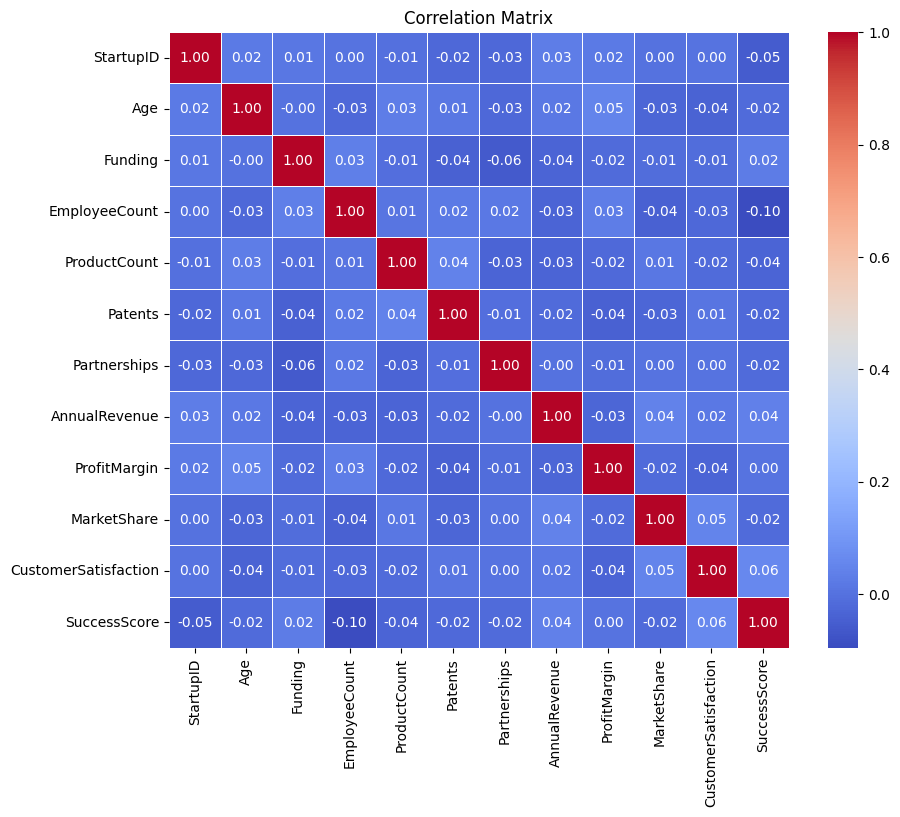

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

NOT much correlation exist between features

### Part1 Task B - Exploratory Data Analysis (EDA) (10 pts)

1. Visualize the distribution of key features and the target variable.
3. Generate a heatmap of the correlation matrix to identify strongly correlated features.

### Part1 Task C - Feature Engineering and PCA (10 pts)

1. Split the data into training and testing sets with 8:2 ratio and standardize the feature set.
2. Plot the explained variance ratio of the principal components and determine the number of components to retain 80% of variance.
3. Apply PCA using the number found in the previous step to reduce the feature size.

### Part1 Task D - MLP for Regression  (15 pts)

1. Design and train two MLP regressors for 100 epochs and batch size 32 using 3 fold cross validation:
- Model 1 without hidden layer
- Model 2 with 1 hidden layer of size 50 neurons

Incorporate L2 regularization in models, use Adam optimizer with a learning rate of 0.01 and Relu activation function in hidden layer.

2. Evaluate the model's performance on the test set using Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics.
3. **Written Answer** Compare the models 1 and 2 and write your conclusion.

**Place holder for Written Answer**



### Part1 TaskE - Gridsearch for Hyperparameter Optimization (HPO) (20 pts)

1. Define a range of potential values for hyperparameters as follows:
    - `hidden_layer_sizes`:50, 100, 150
    - `activation`: tanh','relu'
    - `learning rate`: 0.0001, 0.001, 0.01
    
2. Use GridSearchCV to find the best hyperparameter values based on 3 fold cross-validation on MLP model2 from TaskD.
3. Retrain the model using the optimized hyperparameters and evaluate its performance.


## Part 2 - Binary Classification with a Custom MLP (35 pts)

### Background

You are provided with a schematic of a simple Multilayer Perceptron (MLP) neural network designed for binary classification. This network consists of an input layer with two binary inputs, $x_1$ and $x_2$, a hidden layer with two neurons, $h_1$ and $h_2$, and one output neuron, $y$. The weights and biases are pre-defined as follows:
- Weights from the input to hidden layer: $w_{11} = 20, w_{12} = -20, w_{21} = 20, w_{22} = -20$
- Biases for the hidden layer neurons: $b_{1} = -10, b_{2} = 30$
- Weights from the hidden layer to the output layer are both $20$.
- The bias for the output neuron is $-30$.


<!-- <img src="http://www.example.com/path/to/image/Picture1.png" width="300" height="300" /> -->

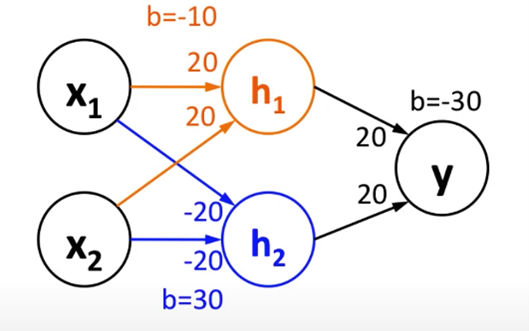


### Objective
Implement a Python program that simulates the described MLP network's forward pass and computes the output for different input combinations.



### Part2 Task A -  Sigmoid Activation Function (20 pts)
Write a function that takes binary inputs $x_1$ and $x_2$ and computes the output $y$ using a sigmoid activation function for both the hidden and output layers.
Calculate and print the predicted output for the following input pairs: (0,0), (0,1), (1,0), (1,1). Round the output to the nearest integer.



### Part2 Task B - Linear Activation Function (10 pts)
Modify the function from TaskA to use a linear activation function instead of the sigmoid.
Calculate and print the predicted output for the same input pairs as above.



### Part2 TaskC - Hidden Neuron operation (3 pts)
Analyze the function of the hidden neuron $h_{1}$ when using a sigmoid activation function. Discuss which logical problem (\(e.g., AND, OR, XOR\)) \$h_{1}$ is solving.


#### Placeholder for Task C answer



### Part2 Task D - MLP operation (2 pts)
Consider the entire network with a sigmoid activation function. Discuss which logical problem the MLP is designed to solve considering the weights and biases configuration.



## Part 3 - Convolutional Neural Network (CNN) - (15 Bonus pts)

### Objective:
Develop a Convolutional Neural Network (CNN) model to classify handwritten digits from the MNIST dataset. Your tasks involve loading and preprocessing the dataset, designing a CNN architecture, training the model while reserving a portion of the data for validation, and evaluating the model's performance. Additionally, assess if the model exhibits overfitting through the analysis of learning curves.


### Part3 TaskA - Image Classification (20 pts)
1. Load the MNIST Dataset which consists of grayscale images of handwritten digits. Normalize the image pixel values to a range of [0, 1], reshape the images to fit the CNN input requirements and convert the labels to one-hot encoded vectors for classification.
2. Design a CNN architecture for classifying MNIST handwritten digits with input layer of 28x28 pixel grayscale images, followed by three convolutional layers with ReLU activation (the first with 32 filters of size 3x3, the second with 64 filters of size 3x3 plus a max pooling layer of size 2x2, and the third also with 64 filters of size 3x3 followed by another max pooling layer of size 2x2). After these, a flatten layer transitions the output to a 1D vector, leading to a dense layer with 64 units (ReLU activation), and culminating in an output layer with 10 units for the 10 digit classes (0-9) using softmax activation.
3. Keep 20% of MNIST training dataset for validation and train the CNN on the remaining part of MNIST training dataset.
4. Plot the learning curves.
5. **Written Answer** Explain whether the model overfits or not.
5. Evaluate the model's accuracy and F1-score on the MNIST test dataset.

**Place holder for Written Answer**
